In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("diamonds.csv")
df.head()


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [ ]:
# Cleaning unnecesary or invalid
df = df.drop(["Unnamed: 0"], axis=1)
df = df.drop(df[df["x"]==0].index)
df = df.drop(df[df["y"]==0].index)
df = df.drop(df[df["z"]==0].index)

##Overview

In [ ]:
print(f"Overview The Dataset:")
print(f"Rows: {df.shape[0]} Columns: {df.shape[1]}")
df.head().style.set_properties(**{"background-color": "#6fa8dc","color":"black","border": "2.5px solid black"})

Overview The Dataset:
Rows: 53920 Columns: 10


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.230000,Ideal,E,SI2,61.500000,55.000000,326,3.950000,3.980000,2.430000
1,0.210000,Premium,E,SI1,59.800000,61.000000,326,3.890000,3.840000,2.310000
2,0.230000,Good,E,VS1,56.900000,65.000000,327,4.050000,4.070000,2.310000
3,0.290000,Premium,I,VS2,62.400000,58.000000,334,4.200000,4.230000,2.630000
4,0.310000,Good,J,SI2,63.300000,58.000000,335,4.340000,4.350000,2.750000


price price in US dollars (\$326--\$18,823)

carat weight of the diamond (0.2--5.01)

cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color diamond colour, from J (worst) to D (best)

clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x length in mm (0--10.74)

y width in mm (0--58.9)

z depth in mm (0--31.8)

depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table width of top of diamond relative to widest point (43--95)

##Correlations

The variables "x," "y," and "z" demonstrate a strong correlation with the target column, while "depth," "cut," and "table" exhibit a low correlation.

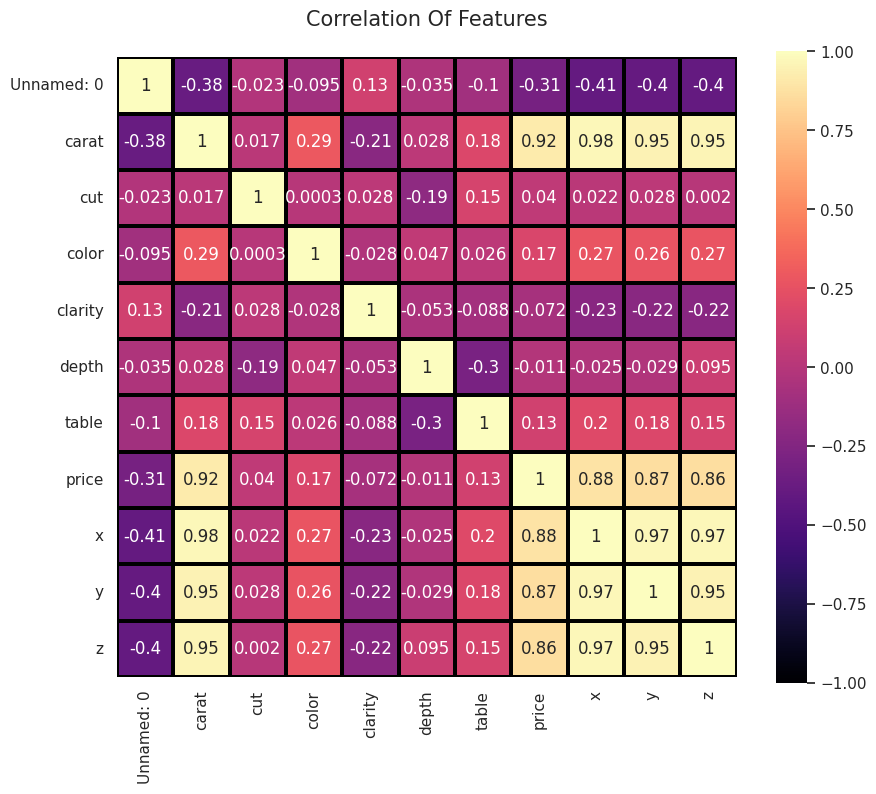

In [5]:
catcol = ["color","clarity","cut"]
le = LabelEncoder()
for col in catcol:
        df[col] = le.fit_transform(df[col])


plt.subplots(figsize =(10, 10))

sns.heatmap(df.corr(), cmap = "magma", square=True, cbar_kws=dict(shrink =.82),
            annot=True, vmin=-1, vmax=1, linewidths=1.5,linecolor='black')
plt.title("Correlation Of Features\n", fontsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

Some datapoints exhibit distinct features that deviate significantly from the rest, potentially influencing the results of our regression model.
These clear outliers will be dealth with throughout the implementation.



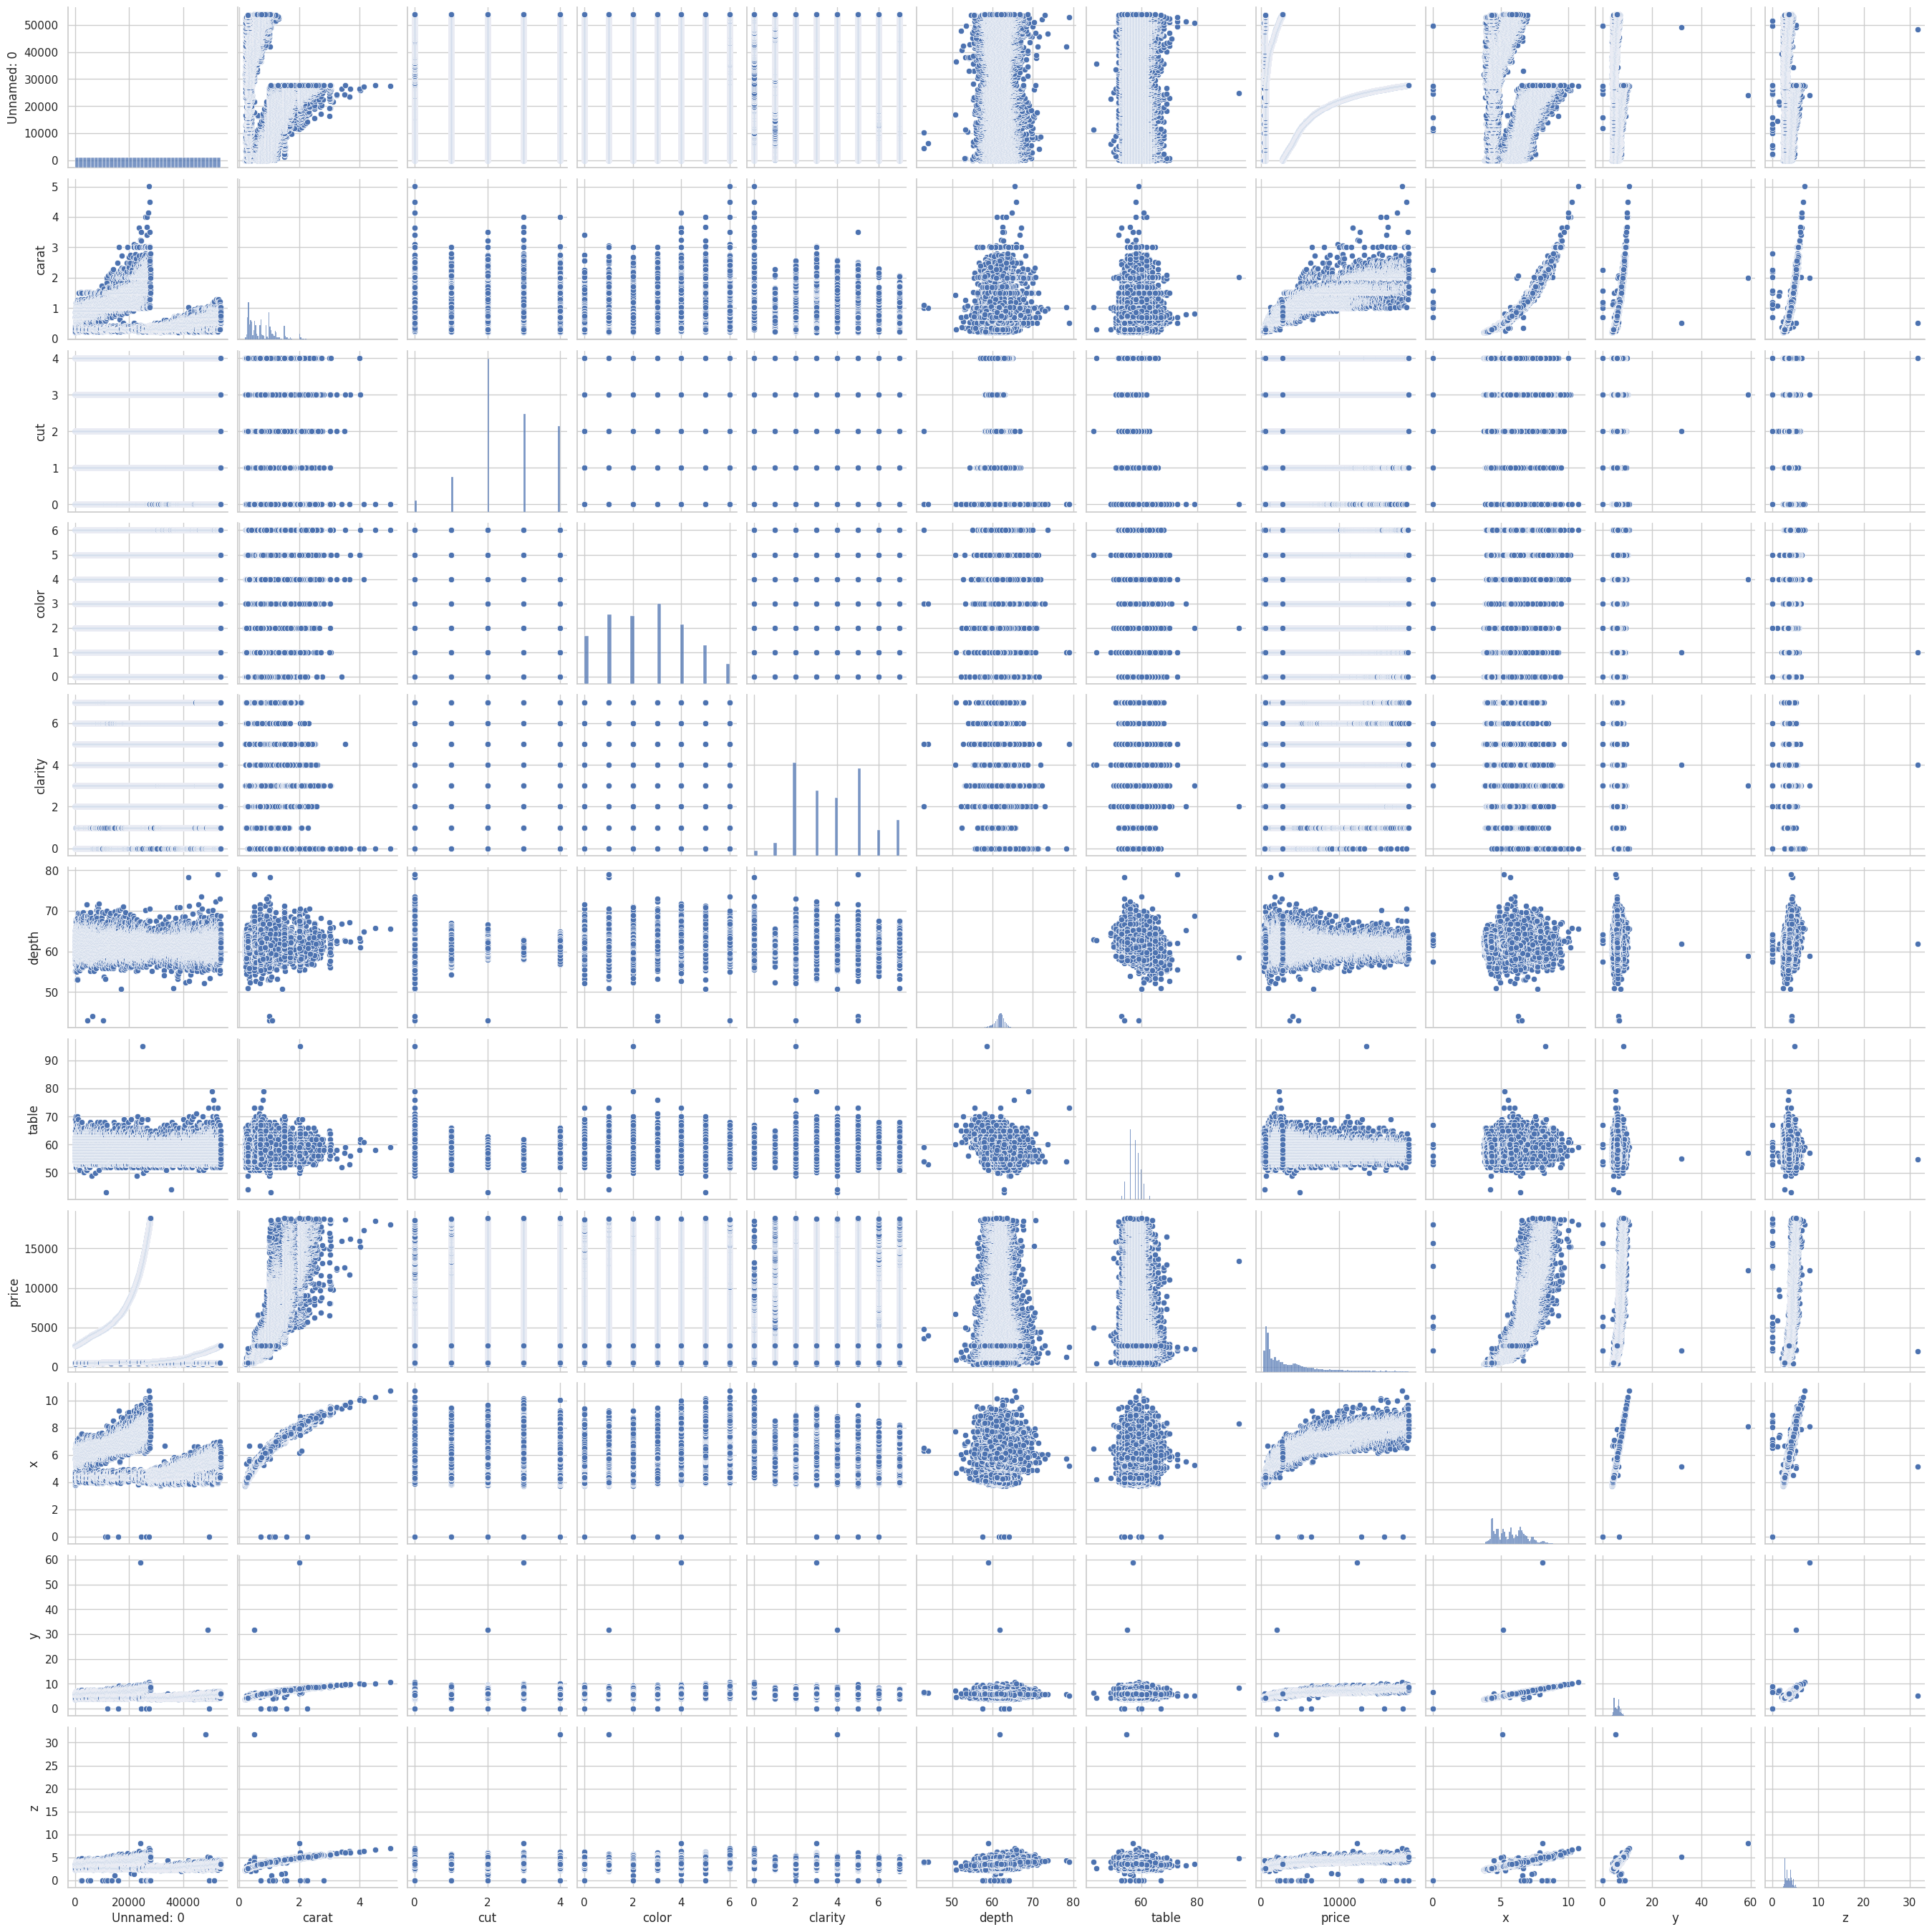

In [6]:
sns.pairplot(df)

Text(0, 0.5, 'Price')

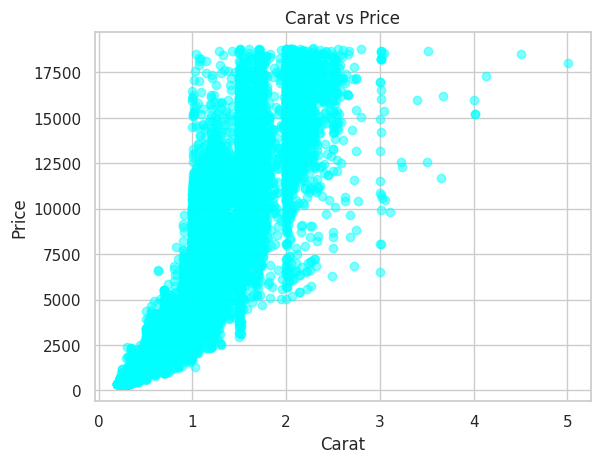

In [13]:
plt.scatter(df['carat'], df['price'], color='cyan', alpha=0.5)
plt.title('Carat vs Price')
plt.xlabel('Carat')
plt.ylabel('Price')

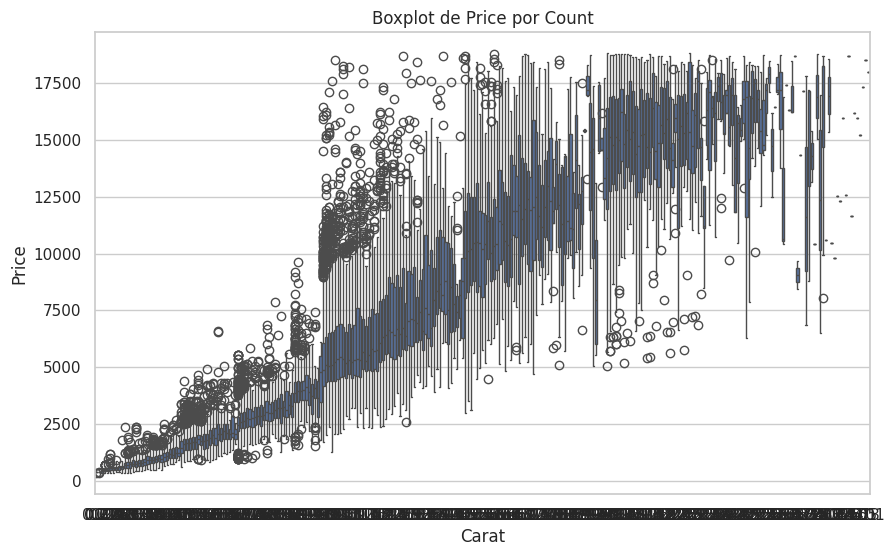

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='carat', y='price', data=df)

# Personalizar título y ejes
plt.title('Boxplot de Price por Count')
plt.xlabel('Carat')
plt.ylabel('Price')

# Mostrar el boxplot
plt.show()

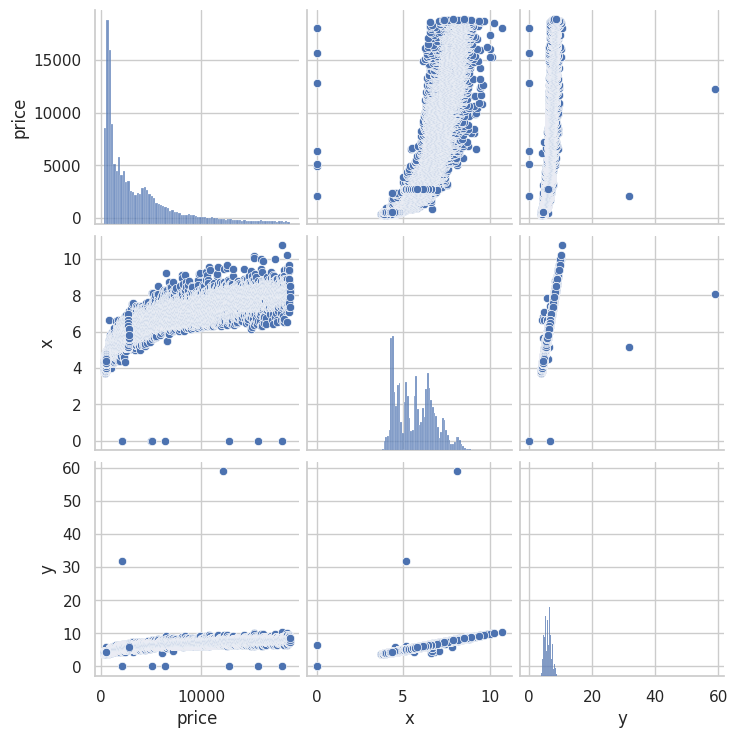

In [10]:
columnas_seleccionadas = ['price', 'x', 'y']

# Filtra el DataFrame para incluir solo las columnas seleccionadas
df_seleccionado = df[columnas_seleccionadas]
sns.pairplot(df_seleccionado)
plt.show()


##Price distribution

The distribution of prices appears to be skewed to the right, with the majority falling within the range of 326 to 10000, representing 90% of the datapoints, and a median of 2401. Additionally, there is a notable presence of high and medium-priced diamonds, which are associated with the rarest and nearly rare categories.

Let's have a look on the distribution of prices :


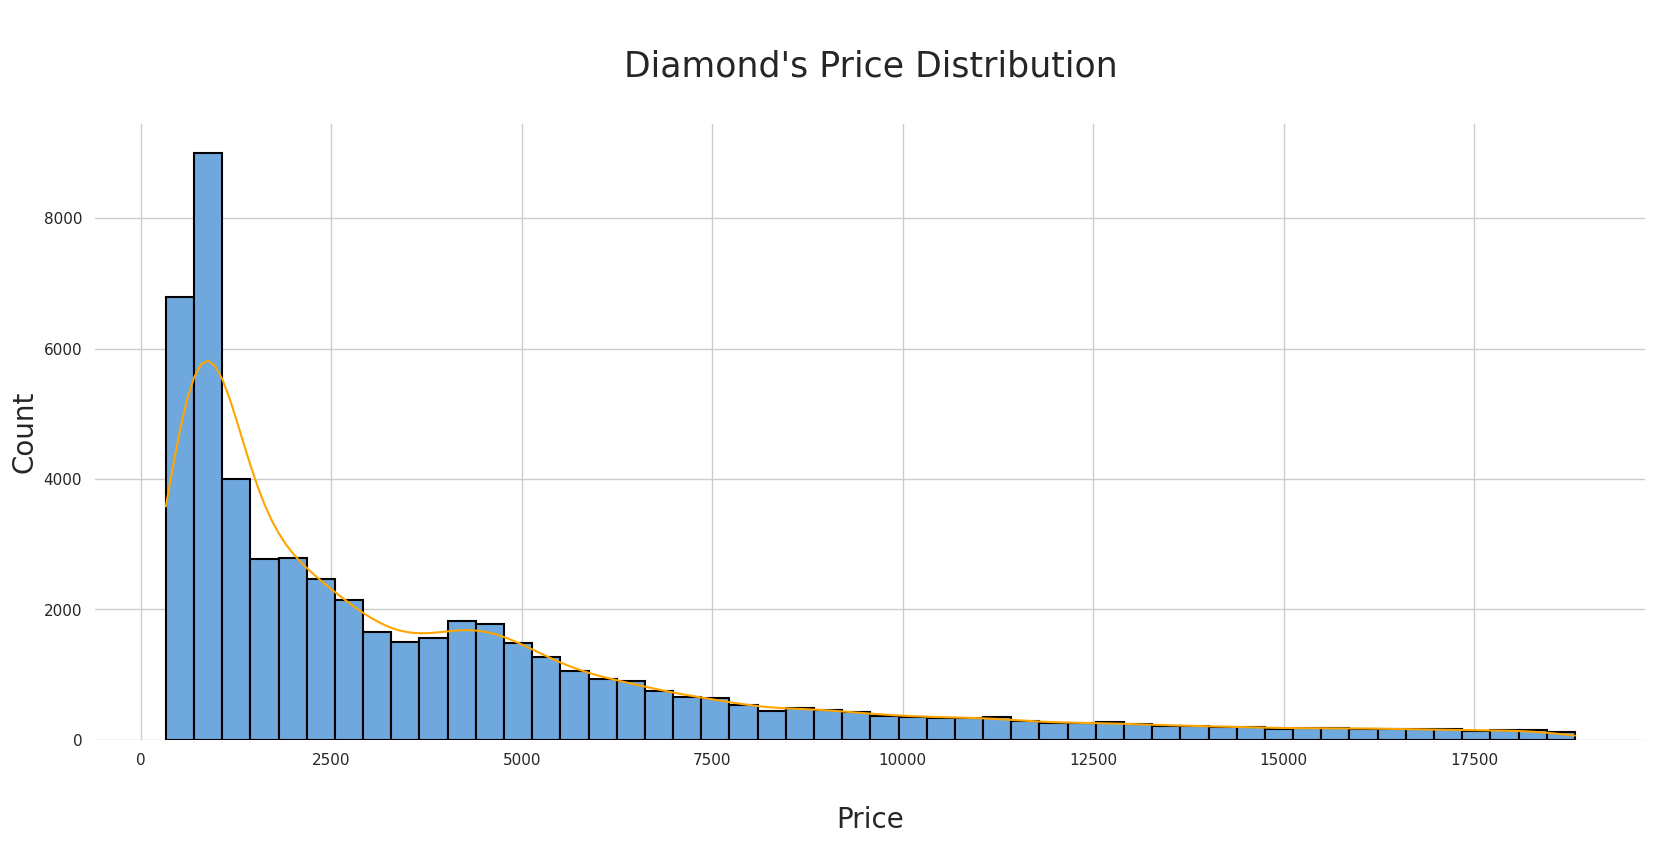

In [ ]:
# Assuming 'data' is your DataFrame
print(f"Let's have a look on the distribution of prices :")

# Create a histogram using seaborn
plt.subplots(figsize=(20, 8))
p = sns.histplot(df["price"], color= "#6fa8dc", kde=True, bins=50, alpha=1, fill=True, edgecolor="black", linewidth=1.5)
p.axes.lines[0].set_color("orange")
p.axes.set_title("\nDiamond's Price Distribution\n", fontsize=25)
plt.ylabel("Count", fontsize=20)
plt.xlabel("\nPrice", fontsize=20)
plt.yscale("linear")
plt.grid(True)
sns.despine(left=True, bottom=True)

# Display the plot
plt.show()


Let's have a look at the distribution of prices :


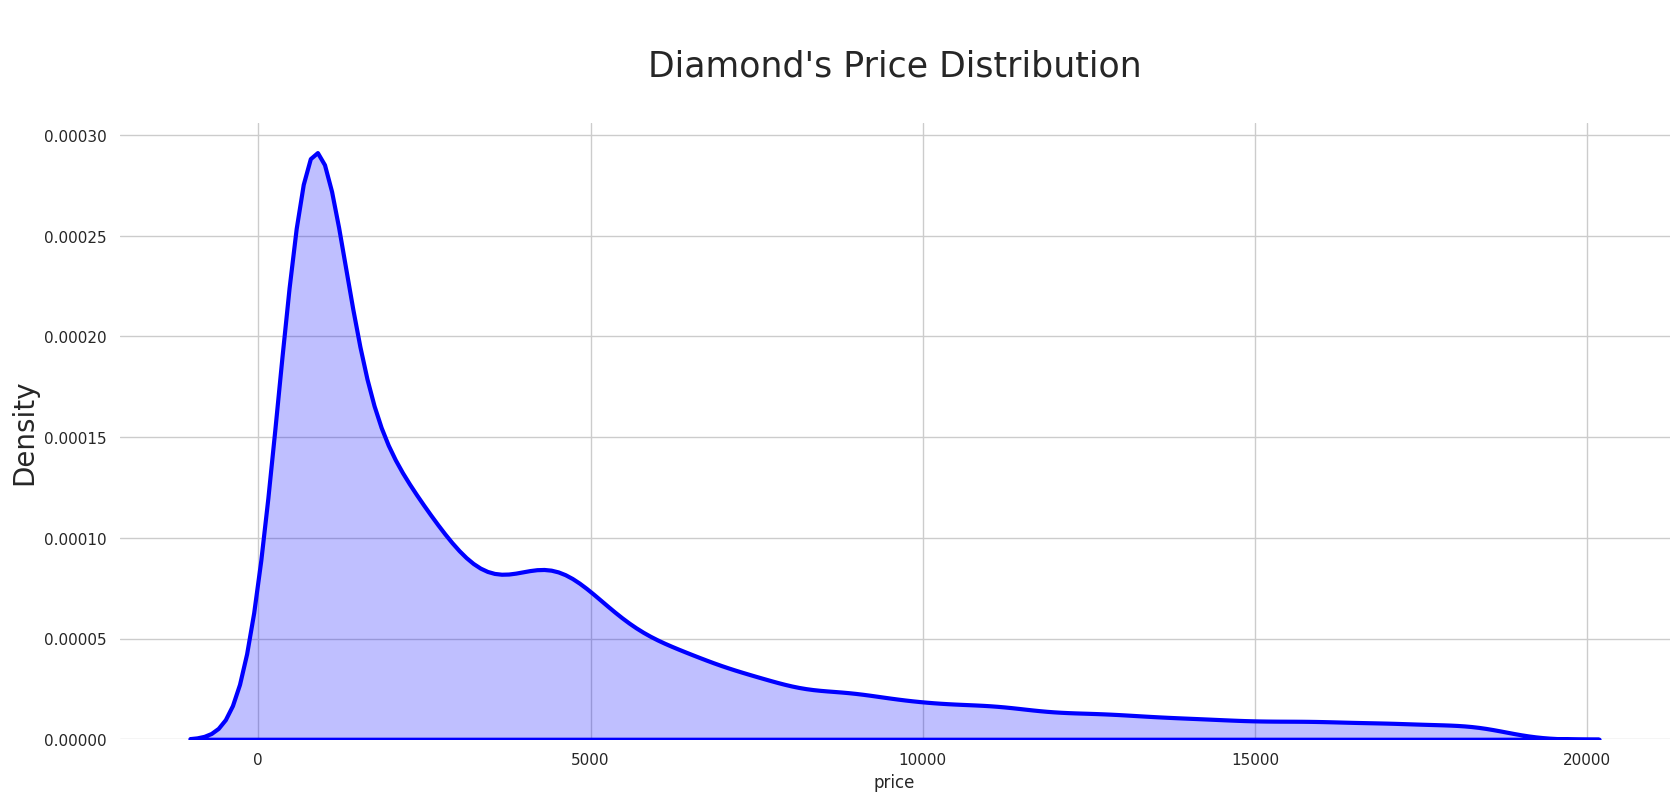

In [ ]:
print(f"Let's have a look at the distribution of prices :")

# Create a KDE plot using seaborn
plt.subplots(figsize=(20, 8))
p = sns.kdeplot(df["price"], color="blue", fill=True, linewidth=3)
p.set_title("\nDiamond's Price Distribution\n", fontsize=25)
plt.ylabel("Density", fontsize=20)
plt.grid(True)
sns.despine(left=True, bottom=True)
plt.show()


In [ ]:
# Calculate deciles
deciles = df['price'].quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

# Display the deciles
print(deciles)

0.1     646.0
0.2     837.0
0.3    1087.0
0.4    1698.0
0.5    2401.0
0.6    3464.0
0.7    4661.3
0.8    6300.0
0.9    9818.1
Name: price, dtype: float64


In [ ]:
# Calculate the interquartile range (IQR)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Set bounds based on IQR (adjust the multiplier as needed)
lower_bound = max(df['price'].min(), Q1 - 1.1 * IQR)  # Ensure the lower bound is not negative
upper_bound = Q3 + 1.1 * IQR

# Filter the DataFrame to include only the rows within the specified range
filtered_df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Calculate the number of data points within the range
count_within_range = len(filtered_df)

# Calculate the total number of data points
total_count = len(df)

# Calculate the percentage of data points within the range
percentage_within_range = (count_within_range / total_count) * 100

print(f"Lower Bound: {lower_bound:.2f}")
print(f"Upper Bound: {upper_bound:.2f}")
print(f"Number of data points within the range: {count_within_range}")
print(f"Total number of data points: {total_count}")
print(f"Percentage within the range: {percentage_within_range:.2f}%")


Lower Bound: 326.00
Upper Bound: 10134.92
Number of data points within the range: 48857
Total number of data points: 53920
Percentage within the range: 90.61%


##Regresion lines

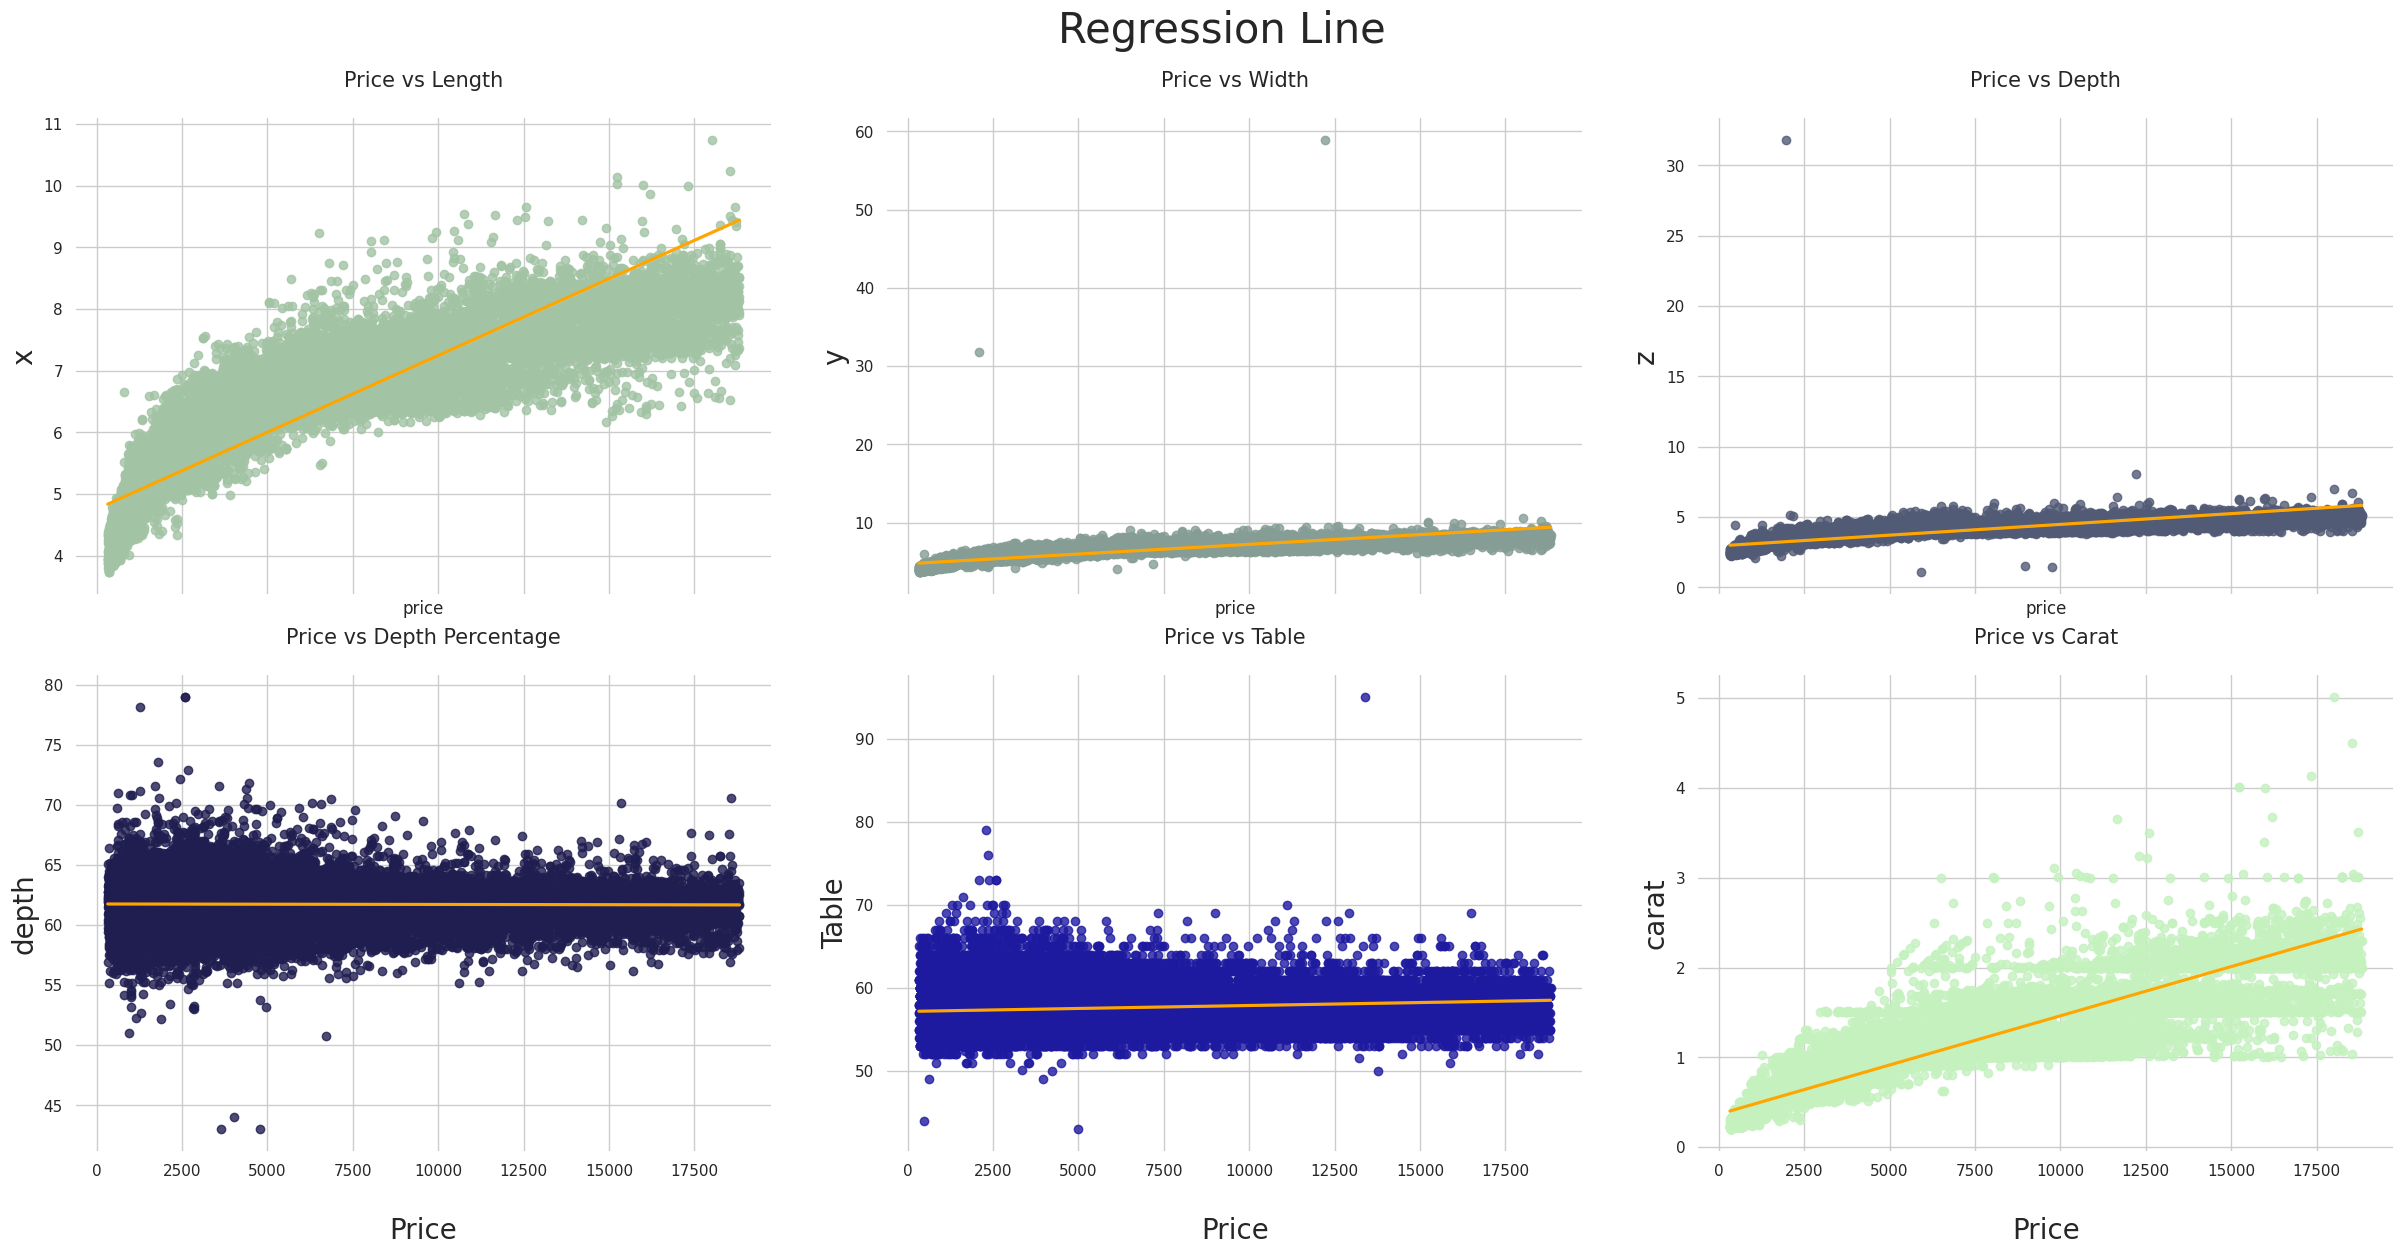

In [ ]:
_, axs = plt.subplots(2,3,figsize=(25,12),sharex=True)
plt.tight_layout(pad=4.0)

sns.regplot(x="price", y="carat", data=df, ax=axs[1,2], color="#C4F1BE", fit_reg=True, line_kws=dict(color= "orange"))
axs[1,2].set_title("Price vs Carat\n",fontsize=15)
axs[1,2].set_xlabel("\nPrice",fontsize=20)
axs[1,2].set_ylabel("carat",fontsize=20)

sns.regplot(x="price", y="x", data=df, ax=axs[0,0], color="#A2C3A4", fit_reg=True, line_kws=dict(color= "orange"))
axs[0,0].set_title("Price vs Length\n",fontsize=15)
axs[0,0].set_ylabel("x",fontsize=20)

sns.regplot(x="price", y="y", data=df, ax=axs[0,1], color="#869D96", fit_reg=True, line_kws=dict(color= "orange"))
axs[0,1].set_title("Price vs Width\n",fontsize=15)
axs[0,1].set_ylabel("y",fontsize=20)

sns.regplot(x="price", y="z", data=df, ax=axs[0,2], color="#525B76", fit_reg=True, line_kws=dict(color= "orange"))
axs[0,2].set_title("Price vs Depth\n",fontsize=15)
axs[0,2].set_ylabel("z",fontsize=20)

sns.regplot(x="price", y="depth", data=df, ax=axs[1,0], color="#201E50", fit_reg=True, line_kws=dict(color= "orange"))
axs[1,0].set_title("Price vs Depth Percentage\n",fontsize=15)
axs[1,0].set_xlabel("\nPrice",fontsize=20)
axs[1,0].set_ylabel("depth",fontsize=20)

sns.regplot(x="price", y="table", data=df, ax=axs[1,1], color="#1E1AA0", fit_reg=True, line_kws=dict(color= "orange"))
axs[1,1].set_title("Price vs Table\n",fontsize=15)
axs[1,1].set_xlabel("\nPrice",fontsize=20)
axs[1,1].set_ylabel("Table",fontsize=20)



plt.suptitle("Regression Line",fontsize=30, y=1.03)
sns.despine(left=True, bottom=True)
plt.show()

Hypothesis:

The price of diamonds is influenced by a combination of the 4 Cs (carat, cut, color, clarity) and physical dimensions (length, width, depth, total depth percentage, table width). Specifically, variations in carat weight, precision of cut, color grade, clarity grade, and geometric dimensions collectively contribute to the pricing of diamonds in a way that reflects both the objective measures of physical attributes and the subjective quality aspects related to the aesthetics of the cut and the rarity of certain color and clarity characteristics

Price and Carat Weight Relationship:

Hypothesis: There is a positive correlation between the diamond price and its carat weight.
Reasoning: Carat weight is a significant factor in determining a diamond's value, and larger diamonds are generally more valuable.
Impact of Cut Quality on Price:

Hypothesis: Diamonds with higher cut quality (e.g., Ideal) are associated with higher prices.
Reasoning: Cut quality affects a diamond's visual appeal, and well-cut diamonds may be more valuable.
Color Grading Influence on Price:

Hypothesis: Diamonds with better color grades (closer to D) are more expensive.
Reasoning: Color is a crucial factor, and colorless diamonds are considered rarer and more valuable.
Clarity's Impact on Price:

Hypothesis: Diamonds with higher clarity grades (e.g., IF) command higher prices.
Reasoning: Clarity reflects the presence of imperfections, and diamonds with fewer inclusions are generally more valuable.
Dimensions and Price Relationship:

Hypothesis: Larger dimensions (length, width, depth) contribute positively to the diamond's price.
Reasoning: Larger diamonds are often more valuable, assuming other factors remain constant.
Effect of Total Depth Percentage on Price:

Hypothesis: There is a correlation between the total depth percentage and diamond price.
Reasoning: The total depth percentage influences the diamond's appearance, and certain proportions may be more desirable.
Relationship between Table Width and Price:

Hypothesis: Diamonds with an ideal table width are associated with higher prices.
Reasoning: The table width contributes to the diamond's brilliance, and well-proportioned diamonds may be more valuable.
Interaction between Cut Quality and Other Factors:

Hypothesis: The impact of cut quality on price may vary based on other factors such as carat, color, and clarity.
Reasoning: Cut quality might have a different weight in determining price when combined with other diamond characteristics.